# Apply DBSCAN Clustering On Amazon Fine Food Reviews

# AVGW2V

In [1]:
# fetching the saved avgw2v files
import numpy as np
X_train_avgw2v = []
with open("Xs_train_avgw2v.txt", "r") as f:
    str1 = ''
    for line in f:
        if(']' in line):
            str1 = str1+line
            len1 = len(str1)
            X_train_avgw2v.append(list(np.float64(x) for x in str1[1:len1-1].strip(']').split()))
            str1 = ''
        else :
            str1 = str1+line
            
# Standarizing the data
from sklearn import preprocessing            
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
avgw2v_data= scaler.fit_transform(X_train_avgw2v[0:10000])    


To find the correct epsilon

In [2]:
min_pts=2*avgw2v_data.shape[1]
distances=[]

for data in avgw2v_data:
    temp_dist=np.sort(np.sum((avgw2v_data-data)**2,axis=1),axis=None)
    distances.append(temp_dist[100])
    
sorted_distances=np.sort(distances)
pt_index=[i for i in range(avgw2v_data.shape[0])]

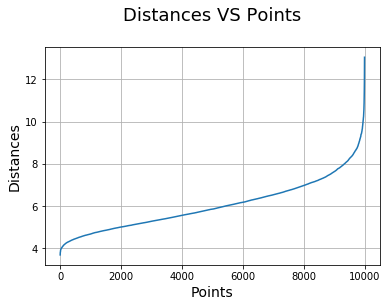

In [25]:
# Plotting distances VS points 
import matplotlib.pyplot as plt
plt.plot(pt_index, np.sqrt(sorted_distances))
plt.xlabel('Points',size=14)
plt.ylabel('Distances',size=14)
plt.title('Distances VS Points\n',size=18)
plt.grid()
plt.show()

OBSERVATION:-  As we can see in this plot, there is inflection at point 9 because there is sudden change in distance after point 9,so we will assume 9 as a optimal Eps for DBSCAN implenetation.

# Function to call DBSCAN Implementation

In [29]:
def dbscanimplement(epsilon , points, Data):
    from sklearn.cluster import DBSCAN
    db = DBSCAN(eps=epsilon, min_samples=points, n_jobs=-1).fit(Data)
      
    # length of number of clusters in labels
    n_clusters = len(set(db.labels_))
    print("Number of clusters for MinPts = %d and Epsilon = %f is : %d "%(points,epsilon,n_clusters))
       
    return db

# DBSCAN Implementation

In [30]:
optimal_eps = 9
# Clustering with optimal epsilon
db1 = dbscanimplement(optimal_eps, min_pts, avgw2v_data)


# Clustering with  epsilon = 8
db2 = dbscanimplement(8, min_pts,avgw2v_data)


# Clustering with epsilon = 10
db3 = dbscanimplement(10, min_pts, avgw2v_data)


# Clustering with epsilon = 11
db4 = dbscanimplement(11, min_pts, avgw2v_data)

Number of clusters for MinPts = 100 and Epsilon = 9.000000 is : 2 
Number of clusters for MinPts = 100 and Epsilon = 8.000000 is : 2 
Number of clusters for MinPts = 100 and Epsilon = 10.000000 is : 1 
Number of clusters for MinPts = 100 and Epsilon = 11.000000 is : 1 


# Visualizing Cluster

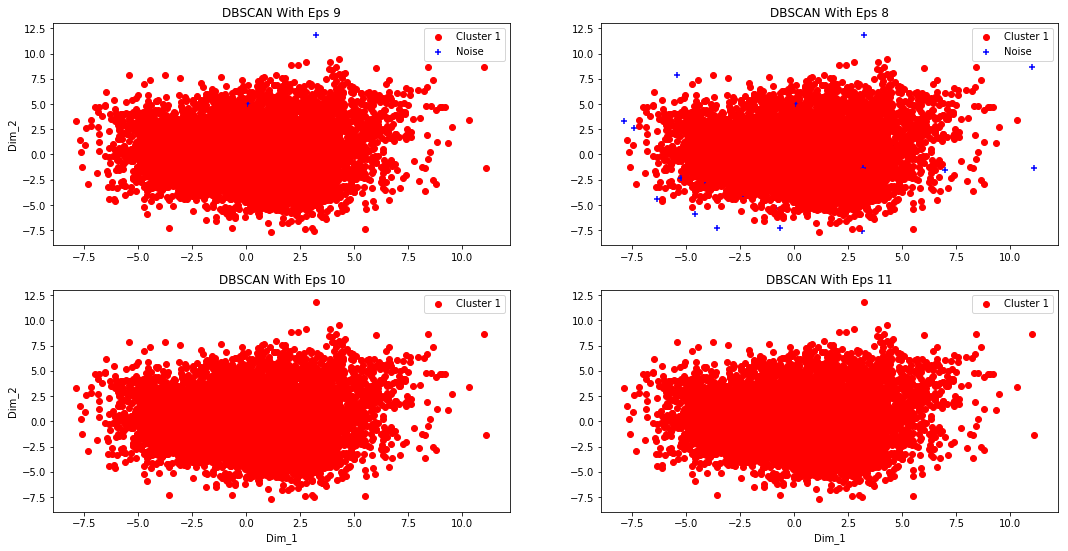

In [42]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2).fit_transform(avgw2v_data)

# Scatter plot for DBSCAN with Eps 9
plt.figure(figsize=(18,9))
plt.subplot(221)
for i in range(0, pca_2d.shape[0]):
    if db1.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db1.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps 9')
plt.ylabel('Dim_2')

# Scatter plot for DBSCAN with Eps 8
plt.subplot(222)
for i in range(0, pca_2d.shape[0]):
    if db2.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db2.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps 8')

# Scatter plot for DBSCAN with Eps 10
plt.subplot(223)
for i in range(0, pca_2d.shape[0]):
    if db3.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
plt.legend([c1], ['Cluster 1'])  
plt.title('DBSCAN With Eps 10')
plt.ylabel('Dim_2')
plt.xlabel('Dim_1')

# Scatter plot for DBSCAN with Eps 11
plt.subplot(224)
for i in range(0, pca_2d.shape[0]):
    if db4.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
plt.legend([c1], ['Cluster 1'])  
plt.title('DBSCAN With Eps 11')
plt.xlabel('Dim_1')

plt.show()

# TF-IDFW2V

In [9]:
X_train_tfidfw2v = []
with open("X_train_tfidfw2v.txt", "r") as f:
    str1 = ''
    for line in f:
        if(']' in line):
            str1 = str1+line
            len1 = len(str1)
            X_train_tfidfw2v.append(list(np.float64(x) for x in str1[1:len1-1].strip(']').split()))
            str1 = ''
        else :
            str1 = str1+line
            
from sklearn import preprocessing            
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
tfidfw2v_data= scaler.fit_transform(X_train_tfidfw2v[0:10000])    

To find right value of epsilon

In [11]:
min_pts=2*tfidfw2v_data.shape[1]
distances=[]

for data in tfidfw2v_data:
    temp_dist=np.sort(np.sum((tfidfw2v_data-data)**2,axis=1),axis=None)
    distances.append(temp_dist[100])
    
sorted_distances=np.sort(distances)
pt_index=[i for i in range(tfidfw2v_data.shape[0])]

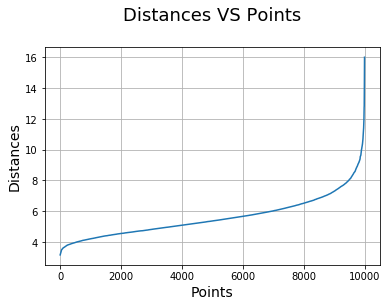

In [13]:
# Plotting distances VS points 
import matplotlib.pyplot as plt
plt.plot(pt_index, np.sqrt(sorted_distances))
plt.xlabel('Points',size=14)
plt.ylabel('Distances',size=14)
plt.title('Distances VS Points\n',size=18)
plt.grid()
plt.show()

OBSERVATION:-  As we can see in this plot, there is inflection at point 9 because there is sudden change in distance after point 9,so we will assume 9 as a optimal Eps for DBSCAN implenetation.

# Function to call DBSCAN implementation

In [14]:
def dbscanimplement(epsilon , points, Data):
    from sklearn.cluster import DBSCAN
    db = DBSCAN(eps=epsilon, min_samples=points, n_jobs=-1).fit(Data)
      
    # length of number of clusters in labels
    n_clusters = len(set(db.labels_))
    print("Number of clusters for MinPts = %d and Epsilon = %f is : %d "%(points,epsilon,n_clusters))
       
    return db

# DBSCAN Implementation

In [15]:
optimal_eps = 9
# Clustering with optimal epsilon
db1 = dbscanimplement(optimal_eps, min_pts, tfidfw2v_data)


# Clustering with  epsilon = 8
db2 = dbscanimplement(8, min_pts,tfidfw2v_data)


# Clustering with epsilon = 10
db3 = dbscanimplement(10, min_pts, tfidfw2v_data)


# Clustering with epsilon = 11
db4 = dbscanimplement(11, min_pts,tfidfw2v_data)

Number of clusters for MinPts = 100 and Epsilon = 9.000000 is : 2 
Number of clusters for MinPts = 100 and Epsilon = 8.000000 is : 2 
Number of clusters for MinPts = 100 and Epsilon = 10.000000 is : 1 
Number of clusters for MinPts = 100 and Epsilon = 11.000000 is : 1 


# Visualizing Clusters

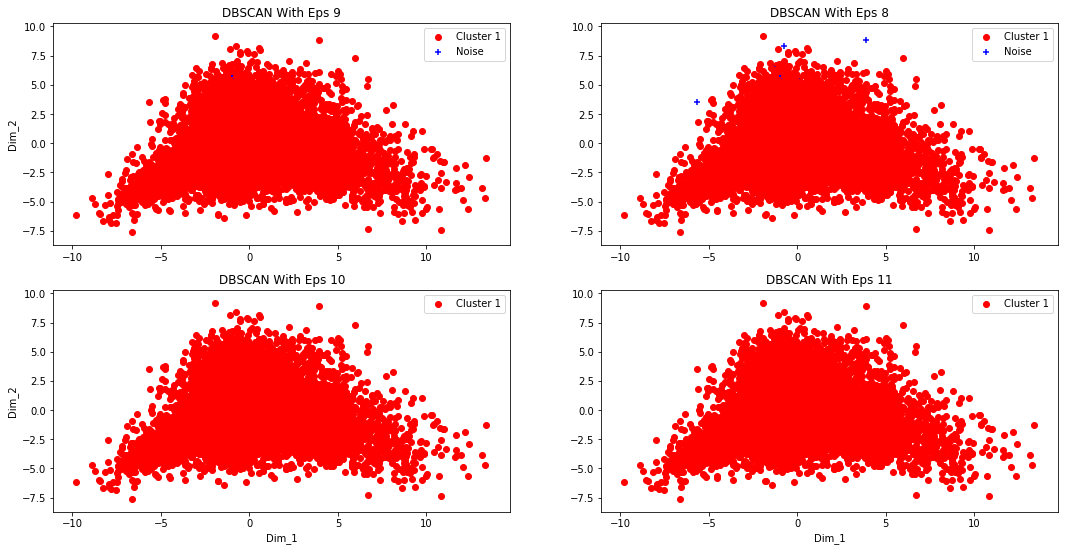

In [16]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2).fit_transform(tfidfw2v_data)

# Scatter plot for DBSCAN with Eps 9
plt.figure(figsize=(18,9))
plt.subplot(221)
for i in range(0, pca_2d.shape[0]):
    if db1.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db1.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps 9')
plt.ylabel('Dim_2')

# Scatter plot for DBSCAN with Eps 8
plt.subplot(222)
for i in range(0, pca_2d.shape[0]):
    if db2.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db2.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps 8')

# Scatter plot for DBSCAN with Eps 10
plt.subplot(223)
for i in range(0, pca_2d.shape[0]):
    if db3.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
plt.legend([c1], ['Cluster 1'])  
plt.title('DBSCAN With Eps 10')
plt.ylabel('Dim_2')
plt.xlabel('Dim_1')

# Scatter plot for DBSCAN with Eps 11
plt.subplot(224)
for i in range(0, pca_2d.shape[0]):
    if db4.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
plt.legend([c1], ['Cluster 1'])  
plt.title('DBSCAN With Eps 11')
plt.xlabel('Dim_1')

plt.show()

# CONCLUSION:-

# Procedure Followed

STEP 1 :- Fetch the data from saved files 

STEP 2 :- Data contains only text data which is already preprocessed and ignored class variable 

STEP 3:- Then vectorize the text data into vectors to apply DBSCAN Clustering

STEP 4:- Standardizing the vectorized data

STEP 5:- Applying the Elbow Method or knee method  in order to find the correct value of Epsilon

STEP 6:- Plot distances VS points to know the inflection point for right value of alpha

STEP 7:- Implementing DBSCAN Cluster with various values of Epsilon including the optimal value of Epsilon

STEP 8:- Draw Scatter plots for DBSCAN with various Epsilon values

STEP 9:- We did it only for AVGW2V and TFIDFW2V because in this two vectorizer we have not more dimension and in BOW and TFIDF we have more dimension than these two that's why we did it only for two.